In [1]:
# imporntando bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# importando dados

base_dados = pd.read_csv("/content/credit_risk_dataset.csv")

**Passo 1: entendendo os dados**

In [ ]:
# 5 primeiras linhas

base_dados.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
# dimensão (linhas e colunas)

base_dados.shape

(32581, 12)

In [ ]:
# nomes das colunas

base_dados.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [ ]:
# infos sobre as colunas

base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
# estatisticas resumo das colunas numericas

base_dados.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


**Passo 2: preparar os dados**

In [3]:
# convertendo tipo de dados

colunas_para_converter = ["person_home_ownership","loan_intent", "loan_grade","cb_person_default_on_file"]

base_dados[colunas_para_converter] = base_dados[colunas_para_converter].astype("string")

In [ ]:
# conferindoa a conversão

base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  string 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  string 
 5   loan_grade                  32581 non-null  string 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  string 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), string(4)
memory usage: 3.0 MB


In [4]:
# renomeando colunas

base_dados = base_dados.rename(columns = { 'person_age': 'idade',
                                          'person_income': 'renda',
                                          'person_home_ownership': 'posse_de_imovel',
                                           'person_emp_length': 'tempo_de_trabalho',
                                           'loan_intent': 'finalidade',
                                           'loan_grade': 'classificacao',
                                           'loan_amnt': 'valor',
                                           'loan_int_rate': 'taxa_de_juros',
                                           'loan_status': 'status',
                                           'loan_percent_income': 'percentual_da_renda_comprometido',
                                           'cb_person_default_on_file': 'historico_de_inadimplencia',
                                           'cb_person_cred_hist_length': 'tempo_de_historico_de_credito'

}).copy()

In [ ]:
# dados duplicados
base_dados.duplicated().sum()

165

In [ ]:
# removendo duplicatas
base_dados = base_dados.drop_duplicates()

In [ ]:
# verificando remoção de duplicatas
base_dados.duplicated().sum()

0

In [ ]:
# conferindo remoção de duplicatas
base_dados.shape

(32416, 12)

In [ ]:
# descobrindo os valores unicos

base_dados['finalidade'].value_counts()

,count
finalidade,
educacao,6411
saude,6042
empreendimento,5682
pessoal,5498
consolidacao_de_dividas,5189
reforma_residencial,3594


In [5]:
# substituir os valores das colunas

base_dados['posse_de_imovel'] = base_dados['posse_de_imovel'].replace({'RENT': 'aluguel',
                                                                       'MORTGAGE': 'hipoteca',
                                                                       'OWN':'casa_propria',
                                                                       'OTHER': 'outro'})

base_dados['finalidade'] = base_dados['finalidade'].replace({'EDUCATION': 'educacao',
                                                             'MEDICAL': 'saude',
                                                             'VENTURE': 'empreendimento',
                                                             'PERSONAL': 'pessoal',
                                                             'DEBTCONSOLIDATION': 'consolidacao_de_dividas',
                                                             'HOMEIMPROVEMENT': 'reforma_residencial'})

base_dados['historico_de_inadimplencia'] = base_dados['historico_de_inadimplencia'].replace({'Y':'sim',
                                                                                             'N':'nao'})

In [ ]:
# verificando substituições
base_dados.head()

,idade,renda,posse_de_imovel,tempo_de_trabalho,finalidade,classificacao,valor,taxa_de_juros,status,percentual_da_renda_comprometido,historico_de_inadimplencia,tempo_de_historico_de_credito
0,22,59000,aluguel,123.0,pessoal,D,35000,16.02,1,0.59,sim,3
1,21,9600,casa_propria,5.0,educacao,B,1000,11.14,0,0.10,nao,2
2,25,9600,hipoteca,1.0,saude,C,5500,12.87,1,0.57,nao,3
3,23,65500,aluguel,4.0,saude,C,35000,15.23,1,0.53,nao,2
4,24,54400,aluguel,8.0,saude,C,35000,14.27,1,0.55,sim,4


In [ ]:
# dados nulos

base_dados.isna().sum()

,0
idade,0
renda,0
posse_de_imovel,0
tempo_de_trabalho,895
finalidade,0
classificacao,0
valor,0
taxa_de_juros,3116
status,0
percentual_da_renda_comprometido,0


Substitui valores errôneos e nulos pela média.

In [6]:
# substituindo erros e null com a média da coluna "tempo_de_emprego"

# erros
media = base_dados['tempo_de_trabalho'].mean()
base_dados['tempo_de_trabalho'] = base_dados['tempo_de_trabalho'].replace({123.0 : media})

# null
base_dados['tempo_de_trabalho'].fillna(base_dados['tempo_de_trabalho'].mean(), inplace = True)


<ipython-input-6-2dfbb44b2527>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  base_dados['tempo_de_trabalho'].fillna(base_dados['tempo_de_trabalho'].mean(), inplace = True)


In [7]:
# substituindo null com a media da coluna "taxa_de_juros"

base_dados['taxa_de_juros'] = base_dados['taxa_de_juros'].fillna(base_dados['taxa_de_juros'].mean())

In [ ]:
# verificando substituição
base_dados['taxa_de_juros'].isnull().sum()

0

In [ ]:
base_dados.head()

,idade,renda,posse_de_imovel,tempo_de_trabalho,finalidade,classificacao,valor,taxa_de_juros,status,percentual_da_renda_comprometido,historico_de_inadimplencia,tempo_de_historico_de_credito,tempo_de_emprego
0,22,59000,aluguel,4.789531,pessoal,D,35000,16.02,1,0.59,sim,3,4.789686
1,21,9600,casa_propria,5.000000,educacao,B,1000,11.14,0,0.10,nao,2,5.000000
2,25,9600,hipoteca,1.000000,saude,C,5500,12.87,1,0.57,nao,3,1.000000
3,23,65500,aluguel,4.000000,saude,C,35000,15.23,1,0.53,nao,2,4.000000
4,24,54400,aluguel,8.000000,saude,C,35000,14.27,1,0.55,sim,4,8.000000


In [ ]:
# verificando nulos
base_dados['tempo_de_trabalho'].isnull().sum()

0

In [ ]:
#  filtrando idade maior que 100 anos
base_dados.loc[base_dados['idade'] > 100]

,idade,renda,posse_de_imovel,tempo_de_trabalho,finalidade,classificacao,valor,taxa_de_juros,status,percentual_da_renda_comprometido,historico_de_inadimplencia,tempo_de_historico_de_credito,tempo_de_emprego
81,144,250000,aluguel,4.0,empreendimento,C,4800,13.57,0,0.02,nao,3,4.0
183,144,200000,hipoteca,4.0,educacao,B,6000,11.86,0,0.03,nao,2,4.0
575,123,80004,aluguel,2.0,educacao,B,20400,10.25,0,0.25,nao,3,2.0
747,123,78000,aluguel,7.0,empreendimento,B,20000,NaN,0,0.26,nao,4,7.0
32297,144,6000000,hipoteca,12.0,pessoal,C,5000,12.73,0,0.00,nao,25,12.0


In [ ]:
# remover idade = 123 ou 144
base_dados = base_dados[~base_dados['idade'].isin([123,144])]

In [8]:
base_dados.describe()

,idade,renda,tempo_de_trabalho,valor,taxa_de_juros,status,percentual_da_renda_comprometido,tempo_de_historico_de_credito
count,32581.000000,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.782225,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,3.978955,6322.086646,3.081605,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,11.011695,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.110000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,41.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


**Passo 3: responder perguntas sobre os dados**

1. Qual a distribuição de idade?

2. Para qual finalidade o empréstimo é pedido com mais frequência?

3. Distribuição de renda.

4. Existe relação entre a idade e renda?

5. A finalidade do empréstimo afeta a taxa de juros aplicada?

6. Pessoas com hipoteca costumam ficar inadimplentes?

7. Existe relação entre taxa de juros e classificação de risco?



**0. Uma procura rápida por correlações importantes**

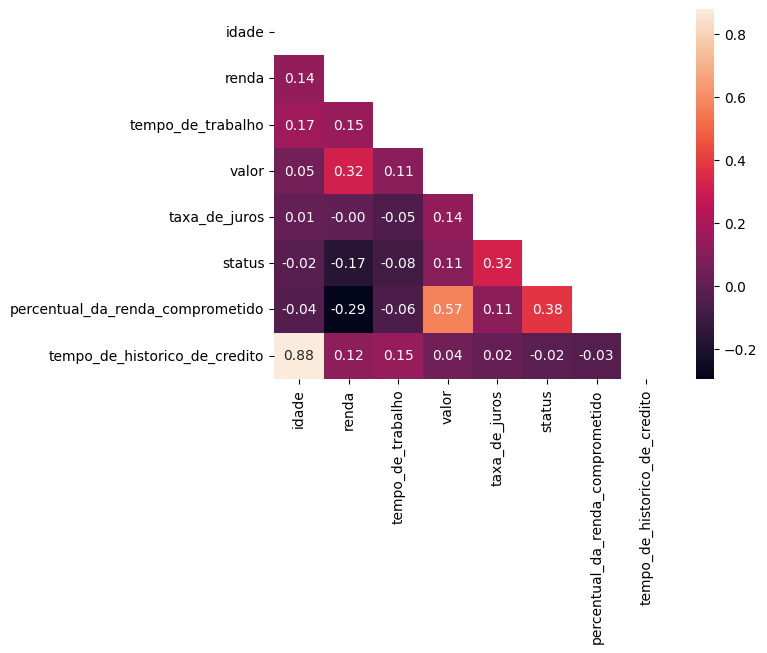

In [ ]:
# heatmap das colunas numéricas

# criando df só de colunas numericas
col_numericas = base_dados.select_dtypes(include = ['int64','float64'])

# criando matriz de correlação
correlacao = col_numericas.corr()

# criando uma mascara superior
mascara = np.triu(np.ones_like(correlacao, dtype = bool))

# plotando o heatmap
sns.heatmap(correlacao, mask = mascara, annot = True, fmt = '.2f')

plt.show()


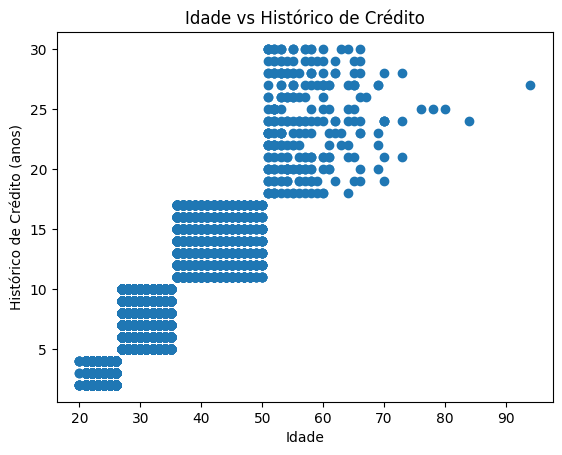

In [ ]:
# grafico de dispersão de idade e historico de credito
plt.scatter(base_dados['idade'], base_dados['tempo_de_historico_de_credito'])

plt.title('Idade vs Histórico de Crédito')
plt.xlabel('Idade')
plt.ylabel('Histórico de Crédito (anos)')

plt.show()

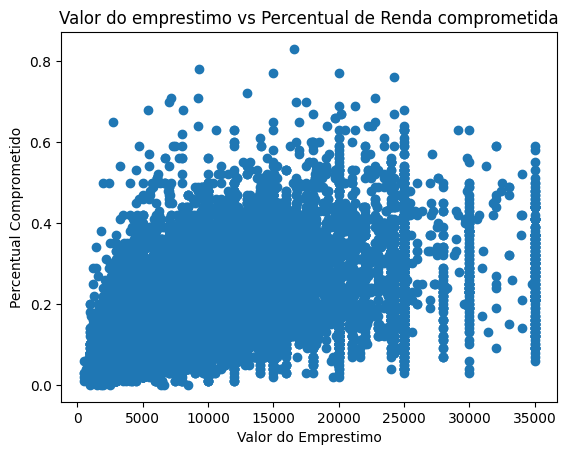

In [ ]:
# grafico de dispersão de valor e renda comprometida
plt.scatter(base_dados['valor'], base_dados['percentual_da_renda_comprometido'])

plt.title('Valor do emprestimo vs Percentual de Renda comprometida')
plt.xlabel('Valor do Emprestimo')
plt.ylabel('Percentual Comprometido')

plt.show()


**1. Qual a distribuição de idade?**

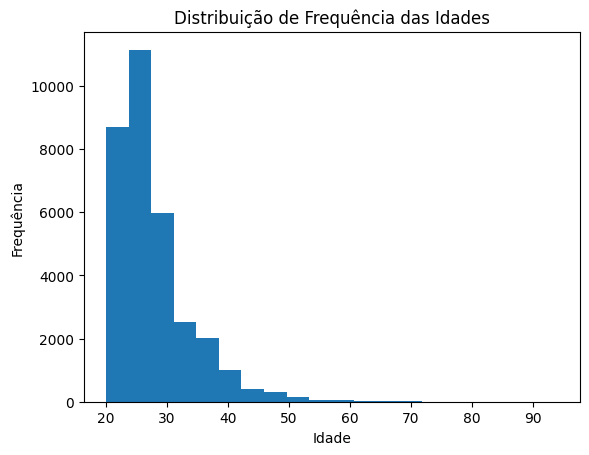

In [ ]:
# histograma da variavel idade
plt.hist(base_dados['idade'], bins = 20)

plt.title('Distribuição de Frequência das Idades')
plt.xlabel('Idade')
plt.ylabel('Frequência')

plt.show()

In [ ]:
base_dados['idade'].describe()

,idade
count,32411.000000
mean,27.730369
std,6.210448
min,20.000000
25%,23.000000
50%,26.000000
75%,30.000000
max,94.000000


Com os gráficos acima, podemos observar que a idade dos clientes vai de 20 a 94 anos.  A idade média é de 27.7 anos. A concentração entre 20 e 30 anos, visto que 75% dos clientes tem até 30 anos e somente 25% tem idade superior a 30 anos.

**2. Para qual finalidade o empréstimo é pedido com mais frequencia?**

In [ ]:
base_dados['finalidade'].value_counts()

,count
finalidade,
educacao,6409
saude,6042
empreendimento,5680
pessoal,5497
consolidacao_de_dividas,5189
reforma_residencial,3594


Os empréstimos são pedidos, em sua maioria, para educação e saúde. Já a menor incidência de pedidos de empréstimo são para reforma residencial.

**3. Distribuição de renda**

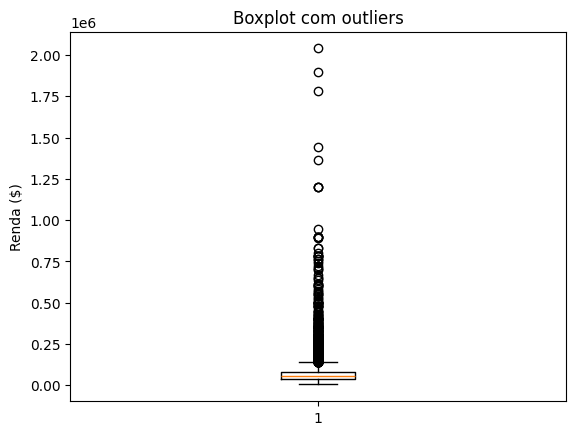

In [ ]:
# renda com outliers

plt.boxplot(base_dados['renda'])

plt.title('Boxplot com outliers')
plt.ylabel('Renda ($)')

plt.show()

In [ ]:
# outliers de renda

#limite_inferior = base_dados['renda'].quantile(0.05) # 5% mais baixos
limite_superior = base_dados['renda'].quantile(0.95) # 5% mais altos

dados_sem_outliers = base_dados[(base_dados['renda'] <= limite_superior)]

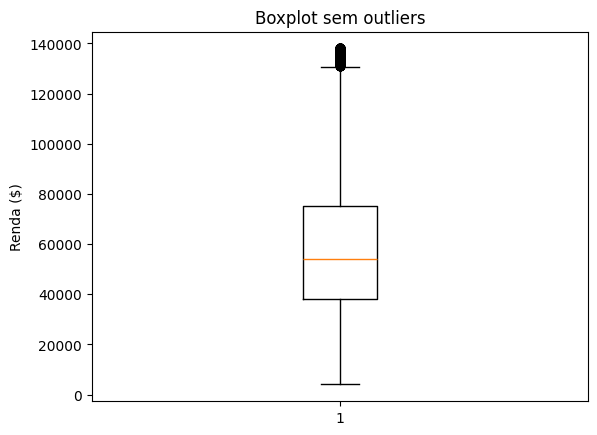

In [ ]:
# boxplot sem outliers (os 5% dos valores mais altos)

plt.boxplot(dados_sem_outliers['renda'])

plt.title('Boxplot sem outliers')
plt.ylabel('Renda ($)')

plt.show()

In [ ]:
# resumo estatistico de 'renda' sem os outliers

dados_sem_outliers['renda'].describe().round(2)

,renda
count,30804.00
mean,58371.29
std,27055.33
min,4000.00
25%,38000.00
50%,54000.00
75%,75000.00
max,138000.00


Observa-se que a renda média dos clientes é de 58.371,29 dólares. A renda máxima observada foi de 138 mil dólares e a mínima de 4 mil.
Além disso, é possível perceber que metade dos clientes têm renda até 54 mil dólares.

**4. Existe relação entre a idade e renda?**

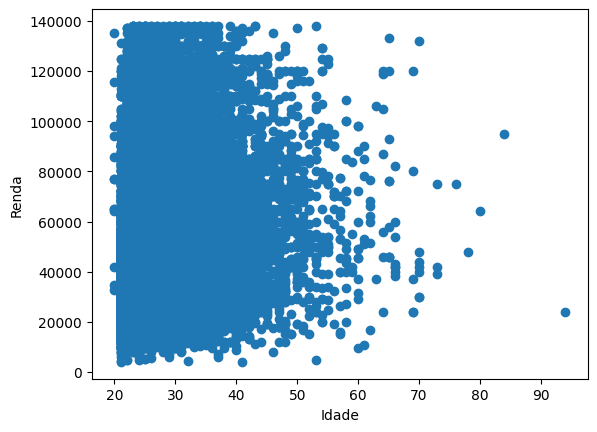

In [ ]:
# grafico de dispersão sem outliers

plt.scatter(dados_sem_outliers['idade'], dados_sem_outliers['renda'])

plt.xlabel('Idade')
plt.ylabel('Renda')

plt.show()

Não existe uma correlação forte entre renda e idade. Isso revela que não é verdadeira a afirmação de que quanto mais idade, maior a renda dos clientes analisados.

**5. A finalidade influencia a taxa de juros?**

In [ ]:
# média de juros por finalidade
dados_sem_outliers.groupby('finalidade')[['taxa_de_juros','renda', 'tempo_de_historico_de_credito']].mean().round(3).sort_values(by = 'taxa_de_juros', ascending = False)

,taxa_de_juros,renda,tempo_de_historico_de_credito
finalidade,,,
reforma_residencial,11.175,64377.978,6.403
saude,11.058,54722.816,5.895
pessoal,10.997,58721.857,6.020
consolidacao_de_dividas,10.982,58287.717,5.632
empreendimento,10.943,58653.606,5.641
educacao,10.941,58060.484,5.105


Até aqui, vê-se que os clientes que pedem empréstimo para reforma residencial tem amior renda e tempo de historico de crédito e também maior taxa de juros. Em contrapartida, o grupo que deseja o emprestimo para cunho educativo tem a segunda menor média renda, os menores tempo de historico de credito e taxa de juros.

In [ ]:
# agrupando por historico de inadimplencia
base_dados.groupby('historico_de_inadimplencia')[['tempo_de_trabalho', 'idade','renda','taxa_de_juros', 'percentual_da_renda_comprometido']].mean()

,tempo_de_trabalho,idade,renda,taxa_de_juros,percentual_da_renda_comprometido
historico_de_inadimplencia,,,,,
nao,4.836941,27.697440,65944.526294,10.331093,0.168440
sim,4.526961,27.814273,65590.783116,14.189484,0.178491


Aqui observamos que o histórico de inadimplencia influencia a taxa de juros visto que para o grupo com histórico de inadimplencia a taxa de juros é 3,85% de diferença. E o percentual de renda comprometida das pessoas com historico de inadimplencia é ligeramente maior que o grupo sem tal historico.

In [ ]:
# tirando o tipo 'outro' da coluna de imoveis
col_imovel_sem_outro = base_dados[base_dados['posse_de_imovel'] != 'outro']

In [ ]:
# rodar o codigo de cima e eliminar este aqui
col_imovel_sem_outro.groupby('posse_de_imovel')[['percentual_da_renda_comprometido']].mean().sort_values(by = 'percentual_da_renda_comprometido', ascending = False)

,percentual_da_renda_comprometido
posse_de_imovel,
casa_propria,0.188777
aluguel,0.182574
hipoteca,0.151349


Os clientes com hipoteca tem menor percentual de renda comprometida sendo 0,15 (15%), enquanto os proprietários de casa própria te, em média, o equivalente a 0,188 (18,8%) da renda comprometida. O maior percentual entre os grupos

**6. Pessoas com hipoteca costumam ficar inadimplentes?**

In [ ]:
dados_hipoteca = base_dados[base_dados['posse_de_imovel'] == 'hipoteca']

dados_hipoteca.groupby('posse_de_imovel')[['historico_de_inadimplencia']].value_counts()

posse_de_imovel  historico_de_inadimplencia
hipoteca         nao                           11448
                 sim                            1994
Name: count, dtype: int64

In [ ]:
# calculando percentual de inadimplentes com hipoteca

# filtro de hipotecados totais
hipoteca_total = base_dados[base_dados['posse_de_imovel'] == 'hipoteca'].shape[0]

# filtro de pessoas com hipoteca e inadimplentes
hipotecados = base_dados[(base_dados['posse_de_imovel'] == 'hipoteca') & (base_dados['historico_de_inadimplencia'] == 'sim')].shape[0]

# calculando percentual
percentual = (hipotecados / hipoteca_total)*100

print(f'Percentual de inadimplentes com hipoteca: {percentual: .2f}%')


Percentual de inadimplentes com hipoteca:  14.83%


Pessoas com hipoteca não costumam ficar inadimplentes. Somente 14,83% dos clientes analisados estão nessa situação.

**7. Existe relação entre taxa de juros e classificação de risco?**

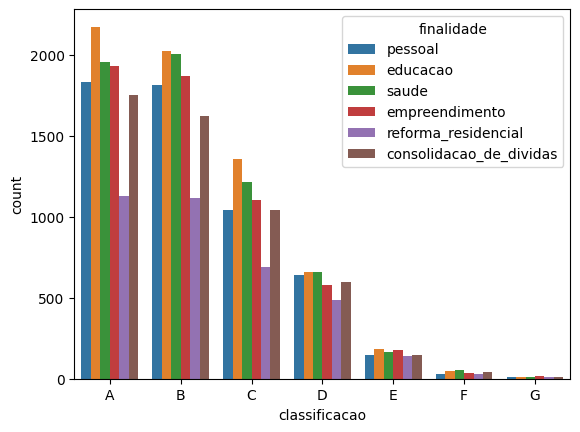

In [ ]:
# ordenar a classificação em ordem alfabetica
ordem_classificacao = sorted(base_dados['classificacao'].unique())

# grafico de barras
sns.countplot(x = 'classificacao', hue = 'finalidade', data = base_dados, order = ordem_classificacao)
plt.show()

In [ ]:
# calculei a média de juros de cada classificação
base_dados.groupby('classificacao')[['taxa_de_juros']].mean()

,taxa_de_juros
classificacao,
A,7.670520
B,10.997173
C,13.224379
D,14.987173
E,16.493050
F,17.757991
G,19.529664


Podemos perceber, portanto, que a classificação influencia na taxa de juros, visto que a taxa de juros sobe a cada classificação (A a G). O que me faz crer que a classificação está divida do menor risco (A) ao maior risco (G).

Observa-se que quanto maior a taxa de classificação de risco, menos interessados há, pois na categoria A tem-se a maior quantidade de clientes e também a menor taxa de juros e a categoria G a menor quantidade de interessados ao passo que exerce a maior taxa de juros.


Obs: status : 0 = não inadimplente, 1 = inadimplente

In [36]:
# tabela com classificação, renda, renda comprometida e inadimplentes

base_dados.groupby('classificacao')[['renda', 'percentual_da_renda_comprometido', 'status', 'taxa_de_juros']].mean()

,renda,percentual_da_renda_comprometido,status,taxa_de_juros
classificacao,,,,
A,66568.207201,0.153683,0.099564,7.670520
B,66354.839154,0.175288,0.162760,10.997186
C,64921.936203,0.170084,0.207340,13.224355
D,63663.682019,0.191026,0.590458,14.987173
E,70873.106846,0.205996,0.644191,16.493050
F,77008.730290,0.215643,0.705394,17.757991
G,76773.296875,0.243906,0.984375,19.529664


Vê-se acima que os grupos 'E', 'F' e 'G' contém, respectivamente, as maiores rendas médias e, não obstante, as maiores taxas de renda comprometida e também de inadimplência.

**8. Relação entre renda comprometida e taxa de juros?**

In [57]:
# montar um df com classificação, renda comprometida e taxa juros e inadimplencia

agrupamento = base_dados.groupby('classificacao')[['renda', 'percentual_da_renda_comprometido', 'status', 'taxa_de_juros', 'valor']].mean()

agrupamento['inadimplentes'] = agrupamento['status']*100

agrupamento

,renda,percentual_da_renda_comprometido,status,taxa_de_juros,valor,inadimplentes
classificacao,,,,,,
A,66568.207201,0.153683,0.099564,7.670520,8539.273453,9.956389
B,66354.839154,0.175288,0.162760,10.997186,9995.483686,16.275954
C,64921.936203,0.170084,0.207340,13.224355,9213.862651,20.733973
D,63663.682019,0.191026,0.590458,14.987173,10849.241589,59.045780
E,70873.106846,0.205996,0.644191,16.493050,12915.845436,64.419087
F,77008.730290,0.215643,0.705394,17.757991,14717.323651,70.539419
G,76773.296875,0.243906,0.984375,19.529664,17195.703125,98.437500


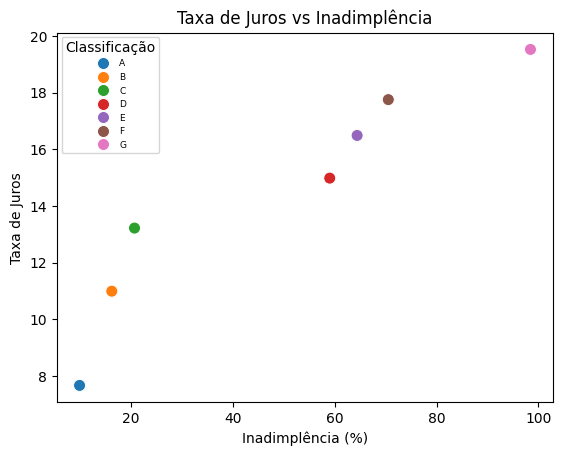

In [55]:
# relação entre taxa de juros e inadimplencia

sns.scatterplot(data = agrupamento, x = 'inadimplentes', y = 'taxa_de_juros', hue = 'classificacao', palette = 'tab10', s = 75)

plt.title('Taxa de Juros vs Inadimplência')
plt.xlabel('Inadimplência (%)')
plt.ylabel('Taxa de Juros')
plt.legend(title = 'Classificação', fontsize = 6.5)
plt.show()


É possível observar uma relação importante entre taxa de juros e inadimplência. Como visto do gráfico de dispersão, agrupando os clientes por classificação, quanto maior a taxa de juros maior a taxa de inadimplência.

In [56]:
base_dados.head()

,idade,renda,posse_de_imovel,tempo_de_trabalho,finalidade,classificacao,valor,taxa_de_juros,status,percentual_da_renda_comprometido,historico_de_inadimplencia,tempo_de_historico_de_credito
0,22,59000,aluguel,4.789686,pessoal,D,35000,16.02,1,0.59,sim,3
1,21,9600,casa_propria,5.000000,educacao,B,1000,11.14,0,0.10,nao,2
2,25,9600,hipoteca,1.000000,saude,C,5500,12.87,1,0.57,nao,3
3,23,65500,aluguel,4.000000,saude,C,35000,15.23,1,0.53,nao,2
4,24,54400,aluguel,8.000000,saude,C,35000,14.27,1,0.55,sim,4


In [61]:
base_dados.groupby('historico_de_inadimplencia')[['status']].mean()

,status
historico_de_inadimplencia,
nao,0.183932
sim,0.378068
